In [31]:
import time
from math import pi, cos

import numpy as np
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt

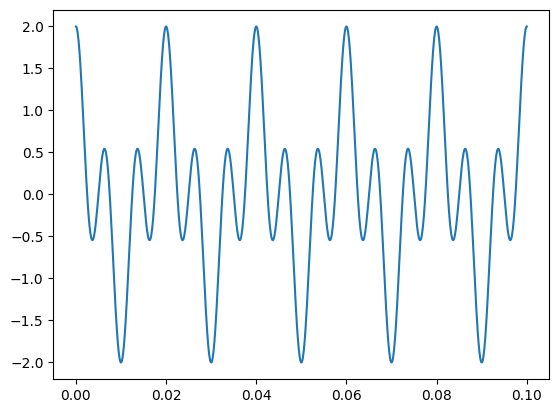

In [32]:
def signal1(t):
    return np.cos(t*2*pi*50) + np.cos(t*2*pi*150)

plt.plot(np.linspace(0.0, 0.1, 1000), signal1(np.linspace(0.0, 0.1, 1000)))
plt.show()

In [33]:
def dft_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [41]:
N = 600 # Количество отсчетов
fmax = 800 # Максимальная частота
T = 1.0/fmax # Минимальный период

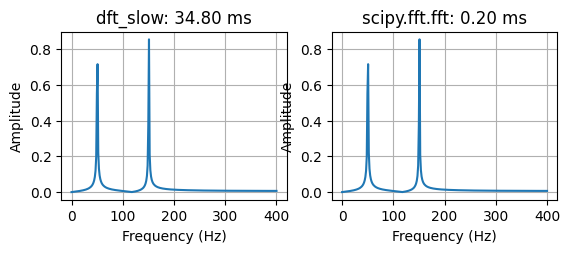

In [42]:
def task1_a():
    x = np.linspace(0.0, N*T, N)
    y = signal1(x)
    xf = np.linspace(0.0, fmax/2, N//2)
    start_time = time.time()
    yf = dft_slow(y)
    time1 = time.time()
    yff = fft(y)
    time2 = time.time()
    
    plt.subplot(221)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yf[0:N//2]))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'dft_slow: {(1000*(time1 - start_time)):.2f} ms')
    
    plt.subplot(222)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yff[0:N//2]))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'scipy.fft.fft: {(1000*(time2 - time1)):.2f} ms')
    plt.show()
    
task1_a()

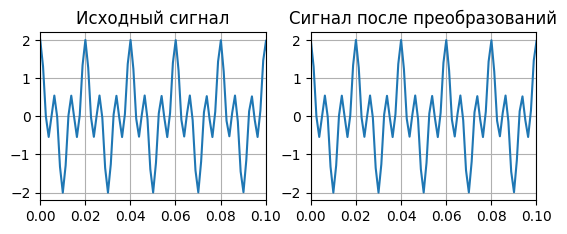

In [46]:
def task1_b():
    x = np.linspace(0.0, N*T, N)
    y = signal1(x)
    yf = dft_slow(y)
    yif = ifft(yf)
    
    plt.subplot(221)
    plt.grid()
    plt.plot(x,y)
    plt.xlim(0,0.1)
    plt.title('Исходный сигнал')
    
    plt.subplot(222)
    plt.grid()
    plt.plot(x,yif)
    plt.xlim(0,0.1)
    plt.title('Сигнал после преобразований')
    
    plt.show()
    
task1_b()

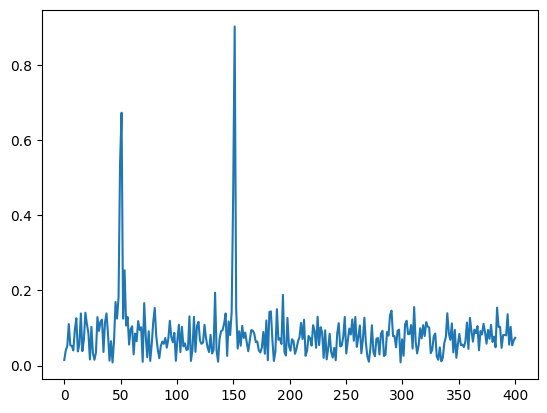

In [59]:
def task1_c():
    signal2 = lambda t: signal1(t) + np.random.normal(0, 1, t.shape)
    x = np.linspace(0.0, N*T, N)
    y = signal2(x)
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = dft_slow(y)
    
    plt.plot(xf, 2.0/N * abs(yf[0:N//2]))
    plt.show()
    
task1_c()

In [95]:
N = 80
fmax = 20
T = 1.0/fmax

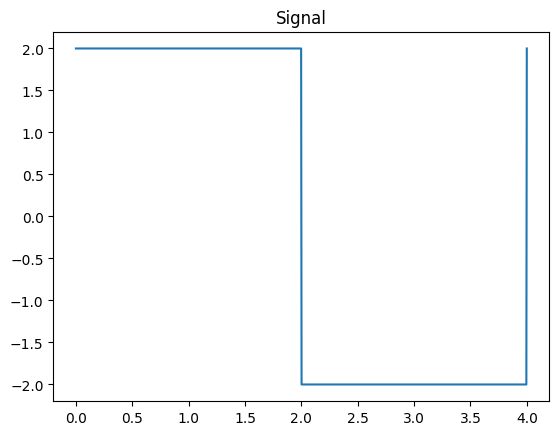

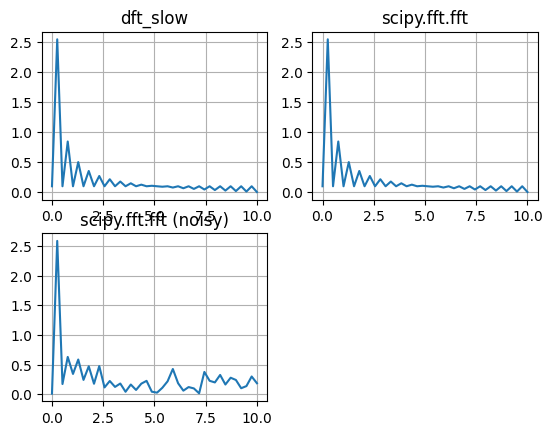

In [98]:
def task2():
    def signal(t):
        y = np.zeros_like(t)
        for i in range(t.shape[0]):
            y[i] = 2 if np.floor(t[i]/2) % 2 == 0 else -2
        return y
            
    plt.plot(np.linspace(0.0, 4.0, 1000), signal(np.linspace(0.0, 4.0, 1000)))
    plt.title('Signal')
    plt.show()
    
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = dft_slow(y)
    yff = fft(y)
    yff_noisy = fft(y + np.rando    m.normal(0.0, 1.0, y.shape))
    
    plt.subplot(221)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yf[0:N//2]))
    plt.title('dft_slow')
    
    plt.subplot(222)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yff[0:N//2]))
    plt.title('scipy.fft.fft')
    
    plt.subplot(223)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yff_noisy[0:N//2]))
    plt.title('scipy.fft.fft (noisy)')
    
    plt.show()
    
task2()

In [154]:
def fast_ft(x):
    n = len(x)
    if n <= 1:
        return x
    even = fast_ft(x[0::2])
    odd = fast_ft(x[1::2])
    w = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]
    return np.array([even[k] + w[k] for k in range(n // 2)] + [even[k] - w[k] for k in range(n // 2)])

In [155]:
N = 1024
fmax = 128
T = 1.0/fmax

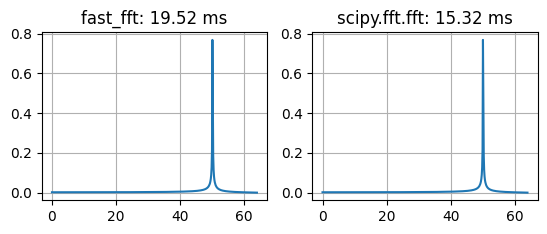

In [157]:
def task3():
    signal = lambda t: np.cos(t*2*pi*50)
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    xf = np.linspace(0.0, fmax/2, N//2)
    time_start = time.time()
    yf = fast_ft(y)
    time1 = time.time()
    yff = fft(y)
    time2 = time.time()
    yff = np.array(yff)
    
    plt.subplot(221)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yf[0:N//2]))
    plt.title(f'fast_fft: {(1000*(time1 - time_start)):.2f} ms')
    
    plt.subplot(222)
    plt.grid()
    plt.plot(xf, 2.0/N * abs(yff[0:N//2]))
    plt.title(f'scipy.fft.fft: {(1000*(time2 - time1)):.2f} ms')
    
    plt.plot()
       
task3()